In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

# !pip3 install pyramid-arima


# Import Data

In [2]:
import os 
os.chdir(r"D:\Mahesh\IMARTICUS\Machine Learning with python\Time Series Analysis\ARIMA\Practice")

In [3]:
df = pd.read_csv(r'Arima_data.csv')

In [4]:
df

,Date,Value
0,01-07-1991,3.526591
1,01-08-1991,3.180891
2,01-09-1991,3.252221
3,01-10-1991,3.611003
4,01-11-1991,3.565869
...,...,...
199,01-02-2008,21.654285
200,01-03-2008,18.264945
201,01-04-2008,23.107677
202,01-05-2008,22.912510


<AxesSubplot:xlabel='Date'>

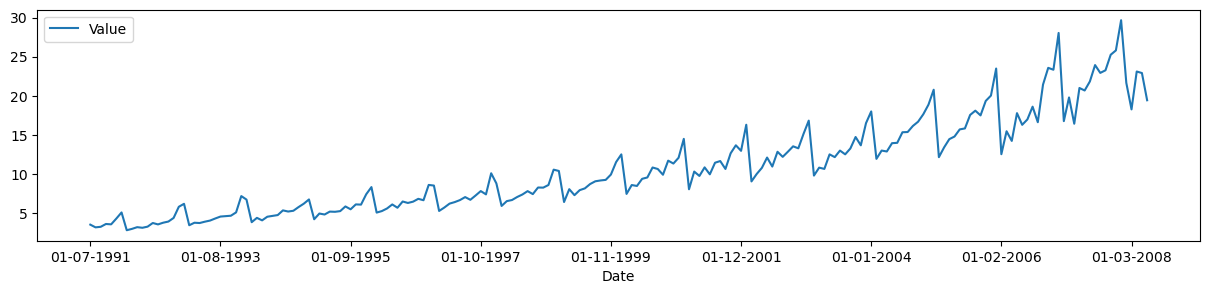

In [5]:
df.plot.line(x = 'Date',y = 'Value',figsize=(15,3))

# Stationary  -- ADF Test

* H0 : - The data is  non-stationary
* H1 : - The data is  stationary

* Alpha = 0.05 

In [6]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['Value'])
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

Test Statistic                   3.145186
p-value                          1.000000
#lags used                      15.000000
number of observations used    188.000000
dtype: float64

* we do not Reject Ho
* The data is  non-stationary

In [7]:
len(df)

204

# Differencing  ( d )

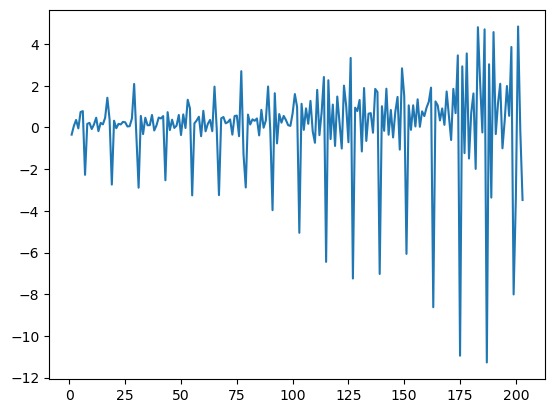

In [8]:
from matplotlib import pyplot

diff = df.Value.diff()
pyplot.plot(diff)
pyplot.show()

In [9]:
df['diff_1'] = df['Value'].diff()
df['diff_2'] = df['Value'].diff(periods=2)
df

,Date,Value,diff_1,diff_2
0,01-07-1991,3.526591,NaN,NaN
1,01-08-1991,3.180891,-0.345700,NaN
2,01-09-1991,3.252221,0.071330,-0.274370
3,01-10-1991,3.611003,0.358782,0.430112
4,01-11-1991,3.565869,-0.045134,0.313648
...,...,...,...,...
199,01-02-2008,21.654285,-8.011071,-4.151805
200,01-03-2008,18.264945,-3.389340,-11.400411
201,01-04-2008,23.107677,4.842732,1.453392
202,01-05-2008,22.912510,-0.195167,4.647565


In [10]:
import numpy as np
np.var(df)  # d = 1

Value     35.311873
diff_1     5.002115
diff_2     6.318760
dtype: float64

In [11]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(df.diff_1.loc[1:,])
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

Observations of Dickey-fuller test


Test Statistic                  -2.495172
p-value                          0.116653
#lags used                      15.000000
number of observations used    187.000000
dtype: float64

* we Reject Ho
* The data is stationary

# ACF & PACF Plot

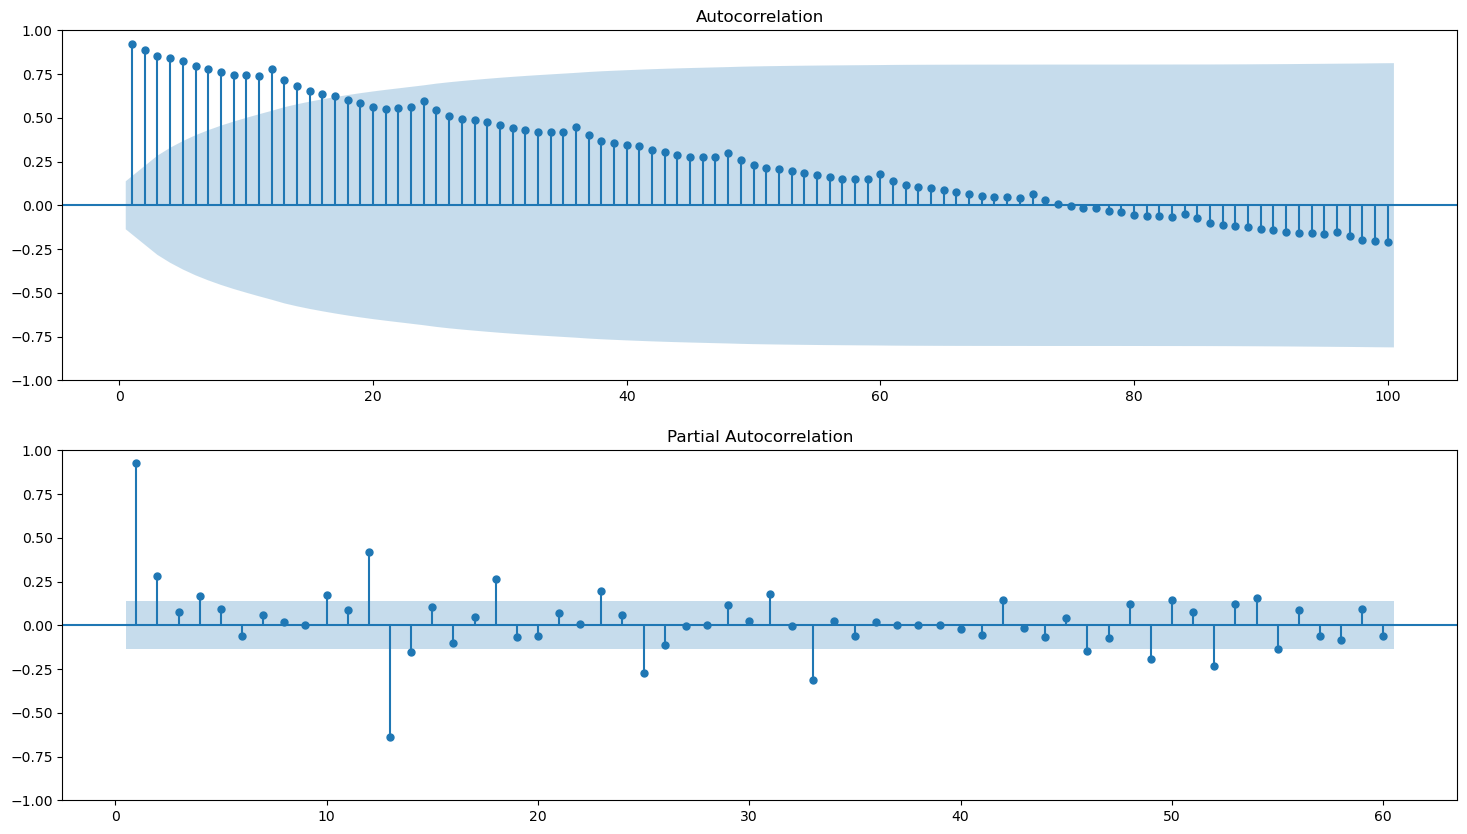

In [12]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))
plot_acf(df['Value'],lags=100, ax=ax[0],zero=False)
plot_pacf(df['Value'],lags=60, ax=ax[1],zero=False)
plt.show()

# ARIMA MODEL -- Auto ( Grid Search )

In [13]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(df.Value,
                      start_p=0,max_p=10, # Pacf(p) = 0,1,2,3
                      d=0,max_d=10,       # Difference (d) = 0,1,2
                      start_q=0,max_q=10, # acf (q) = 0,1,2,3
                      m=12,              # frequency of series
                      seasonal=False,    # No Seasonality  then below P,D,Q will not be used 
                      start_P=0,max_P=0,
                      D=0,max_D=0,
                      start_Q=0,max_Q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1602.665, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=913.571, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1392.713, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=874.416, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=865.809, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=867.147, Time=0.14 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=871.437, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=868.483, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=858.292, Time=0.27 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=859.374, Time=0.23 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=876.756, Time=0.33 

# Fitted Value

In [14]:
df['Forecast']=model.predict_in_sample()
df.iloc[:,[0,1,4]]

,Date,Value,Forecast
0,01-07-1991,3.526591,0.000000
1,01-08-1991,3.180891,3.489668
2,01-09-1991,3.252221,3.293308
3,01-10-1991,3.611003,3.252265
4,01-11-1991,3.565869,3.490797
...,...,...,...
199,01-02-2008,21.654285,25.514983
200,01-03-2008,18.264945,23.512032
201,01-04-2008,23.107677,19.917452
202,01-05-2008,22.912510,23.547629


# Model plot

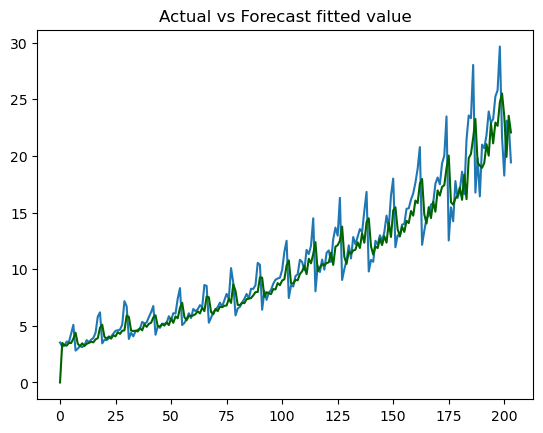

In [15]:
# Plot
plt.plot(df.Value)
plt.plot(df.Forecast, color='darkgreen')
plt.title("Actual vs Forecast fitted value")
plt.show()

# Accuracy metrics

In [16]:
def forecast_accuracy(actual,forecast):
    mape = (np.mean(np.abs(actual-forecast)/np.abs(actual)))*100  # MAPE
    return({'mape':mape})

forecast_accuracy(df.Value,df.Forecast)

{'mape': 12.143772900763988}

#  Forecast - Future Month

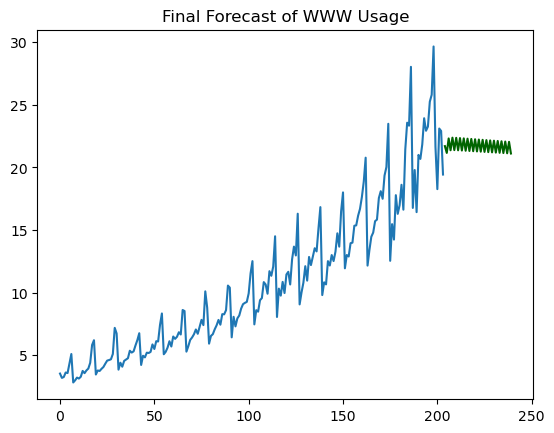

In [17]:
n_periods=36
fc = model.predict(n_periods=n_periods)
index_of_fc = np.arange(len(df.Value), len(df.Value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)

# Plot
plt.plot(df.Value)
plt.plot(fc_series, color='darkgreen')
plt.title("Final Forecast of WWW Usage")
plt.show()

# SARIMAX -- Auto ( Grid Search )

In [18]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
smodel = pm.auto_arima(df.Value,
                      start_p=0,max_p=6, # Pacf(p) = 0,1,2,3
                      d=0,max_d=5,       # Difference (d) = 0,1,2
                      start_q=0,max_q=6, # acf (q) = 0,1,2,3
                      m=12,              # frequency of series or time
                      seasonal=True,     # Seasonality is True then below P,D,Q will be used 
                      start_P=0,max_P=2,
                      D=0,max_D=1,
                      start_Q=0,max_Q=2,
                      test='adf',       # use adftest to find optimal 'd'
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1310.028, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=687.892, Time=0.17 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1602.665, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=908.972, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=684.282, Time=0.19 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=777.061, Time=0.11 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=684.499, Time=0.76 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=682.191, Time=0.52 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=741.656, Time=0.26 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=682.740, Time=0.70 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=802.567, Time=0.55 sec
 ARIMA(2,0,0)(1,0,2)[12] intercept   : AIC=615.586, Time=0.56 sec
 ARIMA(2,0,0)(0,0,2)[12] intercept   : 

# Fitted Value

In [19]:
df['S_Forecast']=smodel.predict_in_sample()
df.iloc[:,[0,1,5]]

,Date,Value,S_Forecast
0,01-07-1991,3.526591,0.000000
1,01-08-1991,3.180891,3.506780
2,01-09-1991,3.252221,3.390176
3,01-10-1991,3.611003,3.314105
4,01-11-1991,3.565869,3.275324
...,...,...,...
199,01-02-2008,21.654285,19.822836
200,01-03-2008,18.264945,22.415696
201,01-04-2008,23.107677,20.555724
202,01-05-2008,22.912510,22.828109


# Model plot

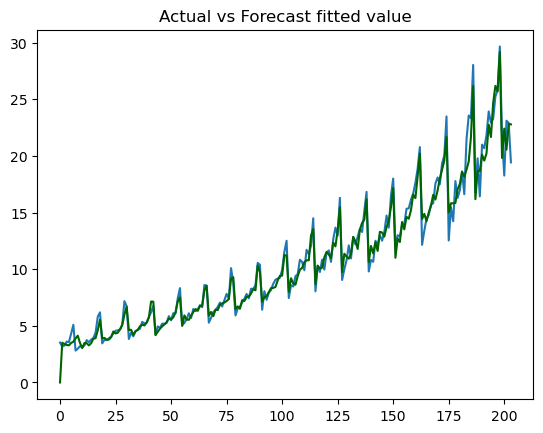

In [20]:
# Plot
plt.plot(df.Value)
plt.plot(df.S_Forecast, color='darkgreen')
plt.title("Actual vs Forecast fitted value")
plt.show()

# Accuracy metrics

In [21]:
def forecast_accuracy(actual,forecast):
    mape = (np.mean(np.abs(actual-forecast)/np.abs(actual)))*100  # MAPE
    return({'mape':mape})

forecast_accuracy(df.Value,df.S_Forecast)

{'mape': 6.487690923098686}

#  Forecast

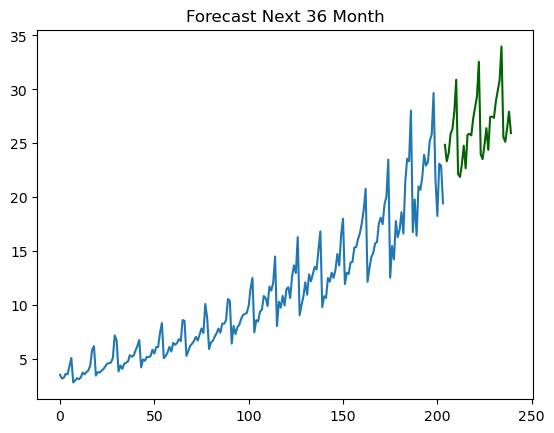

In [22]:
n_periods=36
future_Forecast = smodel.predict(n_periods=n_periods)
index_of_future_Forecast = np.arange(len(df.Value), len(df.Value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(future_Forecast, index=index_of_future_Forecast)

# Plot
plt.plot(df.Value)
plt.plot(fc_series, color='darkgreen')
plt.title("Forecast Next 36 Month")
plt.show()

# Finished